In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ikd\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
train_values = pd.read_csv("E:/DataScience_Study/Aegis/Term-1/Project-Sessions/Bhavik Gandhi_ML/Proj-2_Classification/Pump-it-up/train_values.csv")
train_labels = pd.read_csv("E:/DataScience_Study/Aegis/Term-1/Project-Sessions/Bhavik Gandhi_ML/Proj-2_Classification/Pump-it-up/train_labels.csv")

In [3]:
train = pd.merge(train_values, train_labels)

In [4]:
pd.set_option('display.max_columns', 50)
train.head(5)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
t1 = train._get_numeric_data()
t1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


In [6]:
print(train.isnull().sum().sort_values(ascending=False))


scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
num_private                  0
basin                        0
wpt_name                     0
latitude                     0
longitude                    0
gps_height                   0
date_recorded                0
amount_tsh                   0
population                   0
status_group                 0
recorded_by                  0
water_quality                0
waterpoint_type              0
source_class                 0
source_type                  0
source                       0
quantity_group               0
quantity                     0
quality_group                0
payment_type                 0
waterpoi

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [8]:
# count of pumps according to functional status
train.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [9]:
# proportions of each function of pumps
train.status_group.value_counts()/len(train)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [10]:
train.status_group.groupby(train.payment).groups

{'never pay': Int64Index([    1,     3,     4,     6,     8,     9,    10,    14,    15,
                18,
             ...
             59377, 59379, 59381, 59384, 59386, 59389, 59390, 59391, 59392,
             59398],
            dtype='int64', length=25348),
 'other': Int64Index([   12,    73,    96,   106,   107,   123,   158,   168,   287,
               334,
             ...
             58728, 58752, 59011, 59018, 59040, 59089, 59189, 59196, 59262,
             59374],
            dtype='int64', length=1054),
 'pay annually': Int64Index([    0,    19,    38,    48,    49,   163,   192,   196,   244,
               246,
             ...
             59270, 59272, 59308, 59314, 59322, 59338, 59367, 59373, 59380,
             59396],
            dtype='int64', length=3642),
 'pay monthly': Int64Index([   13,    16,    20,    23,    26,    28,    29,    37,    42,
                62,
             ...
             59348, 59358, 59359, 59360, 59370, 59375, 59378, 59385, 59394,
    

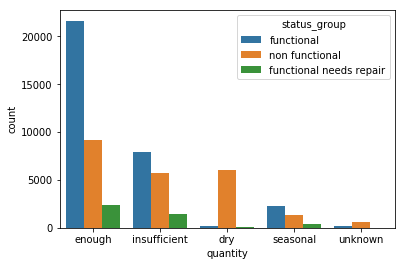

In [11]:
sns.countplot(x='quantity', data=train, hue='status_group') # dry quantity has more nonfunctional water pumps


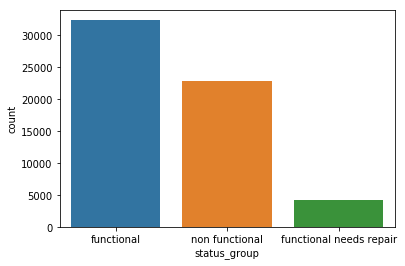

In [12]:
sns.countplot(train.status_group)

    

In [14]:
train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

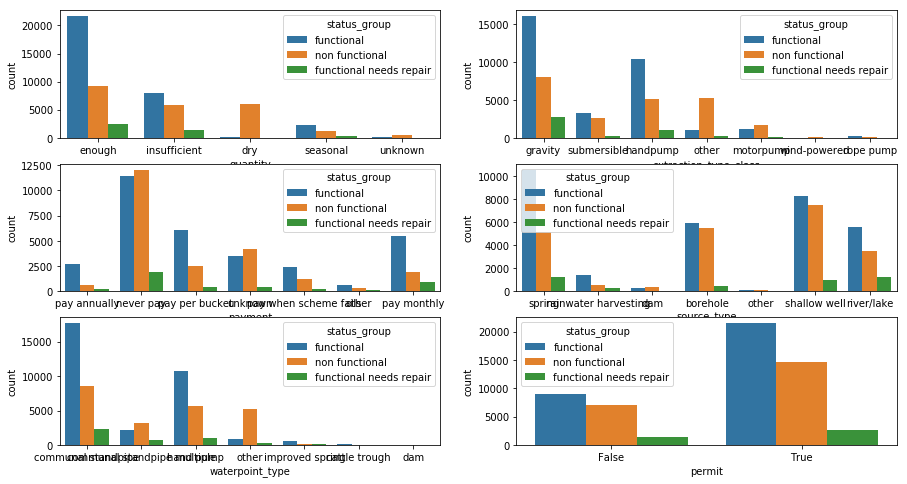

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
plt.subplot(3,2,1)
sns.countplot(x='quantity', data=train, hue='status_group') # dry quantity has more nonfunctional water pumps
#plt.xticks(rotation=-45)
plt.subplot(3,2,2)
sns.countplot(x='extraction_type_class', data=train, hue='status_group') # 
#plt.xlabel('xlabel', fontsize=18)
plt.subplot(3,2,3)
sns.countplot(x='payment', data=train, hue='status_group')
plt.subplot(3,2,4)
sns.countplot(x='source_type', data=train, hue='status_group')
plt.subplot(3,2,5)
sns.countplot(x='waterpoint_type', data=train, hue='status_group')
plt.subplot(3,2,6)
sns.countplot(x='permit', data=train, hue='status_group')
#plt.tight_layout()
plt.show()


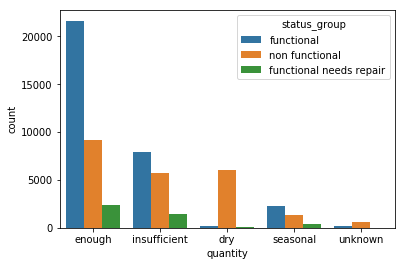

In [16]:
sns.countplot(x='quantity', data=train, hue='status_group') # dry quantity has more nonfunctional water pumps


C:\Users\ikd\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


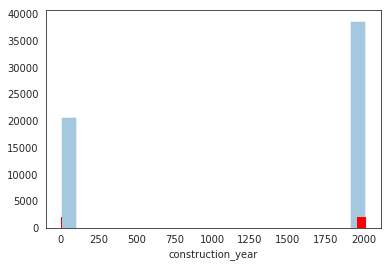

In [17]:
#continous variables:
with sns.axes_style('white'):
    sns.distplot(train.construction_year, hist=True, kde=False, rug=True, rug_kws={"color": "r"})

C:\Users\ikd\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


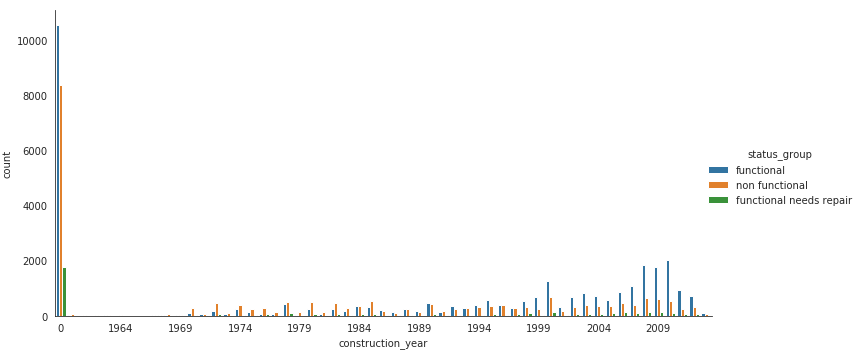

In [18]:
#sns.factorplot("construction_year", train.amount_tsh, train.status_group, data=train, kind="box")
with sns.axes_style('white'):
    g = sns.factorplot("construction_year", data=train, aspect=2, hue='status_group',
                       kind="count")
    g.set_xticklabels(step=5)

C:\Users\ikd\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


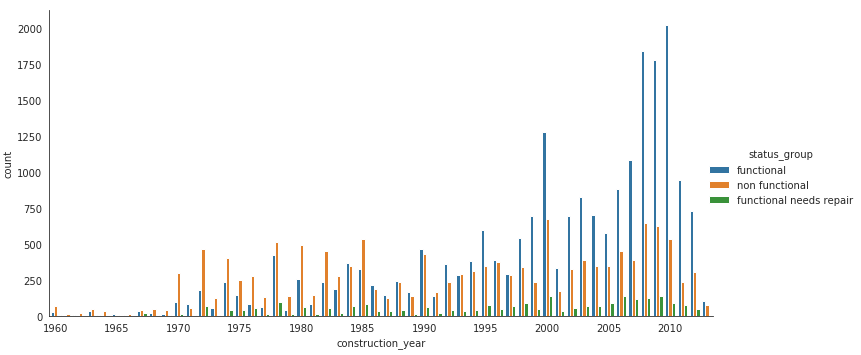

In [19]:
x = train[train['construction_year'] > 0]

with sns.axes_style('white'):
    g = sns.factorplot('construction_year', data=x, aspect=2, hue='status_group',
                       kind="count")
    g.set_xticklabels(step=5)

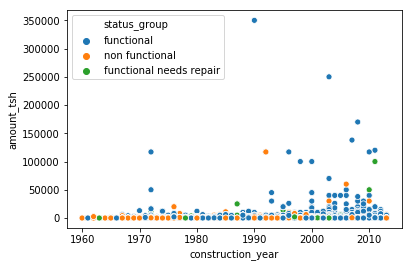

In [20]:
sns.scatterplot(x=x.construction_year, y=x.amount_tsh, hue=x.status_group) #older the pumps more are nonfunctional

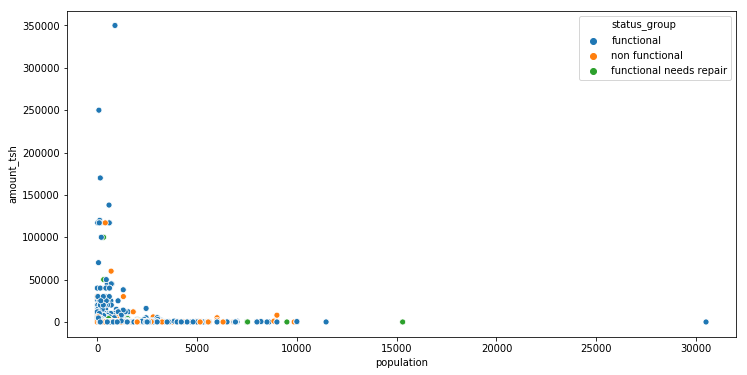

In [21]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x=x.population, y=x.amount_tsh, hue=x.status_group) # as population increases amount of water decreases

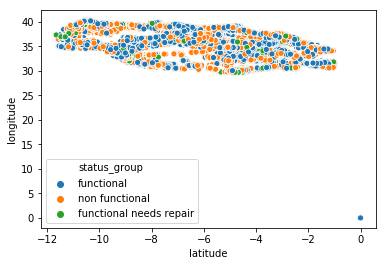

In [22]:
sns.scatterplot(y=train.longitude, x=train.latitude, hue=train.status_group)

# Handling Missing Data

In [13]:
total = train.isna().sum().sort_values(ascending=False)
perc = (train.isnull().sum()/train.isnull().count() * 100).sort_values(ascending=False)

In [14]:
missing_data = pd.concat([total, perc], axis=1, keys=['Total', 'Percent'])
missing_data.head(10) # from this result will remove scheme_name as missing data is close to 50%

,Total,Percent
scheme_name,28166,47.417508
scheme_management,3877,6.526936
installer,3655,6.153199
funder,3635,6.119529
public_meeting,3334,5.612795
permit,3056,5.144781
subvillage,371,0.624579
ward,0,0.000000
lga,0,0.000000
district_code,0,0.000000


In [15]:
# outliers/ Anomolies Handling:

train_0 = train[(train.construction_year > 0) & (train.population > 0)]
print("Before : construction year with 0", train.shape)
print("After : Anomalies handling", train_0.shape)

Before : construction year with 0 (59400, 41)
After : Anomalies handling (37344, 41)


In [16]:
train_0 = train_0.drop(['id', 'date_recorded', 'num_private', 'wpt_name', 'scheme_name', 'funder', 'recorded_by', 'installer' ], axis=1)

In [18]:
train_0.head(5)

,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,1399,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,686,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
5,20.0,0,39.172796,-4.765587,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,VWC,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional


In [19]:
train_not_missing = train_0.copy()

for column in ['scheme_management', 'public_meeting', 'permit', 'subvillage']:
    train_not_missing[column].fillna(train_not_missing[column].mode()[0], inplace=True)
    
train_not_missing.isna().sum().sort_values(ascending=False)

status_group             0
construction_year        0
gps_height               0
longitude                0
latitude                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
permit                   0
extraction_type          0
waterpoint_type_group    0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
amount_tsh               0
dtype: int64

In [20]:
train_not_missing_dummies = pd.get_dummies(train_not_missing.drop('status_group', axis=1))
train_not_missing_dummies.shape

(37344, 13409)

In [21]:
train_not_missing.head(10)

,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,1399,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,686,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
5,20.0,0,39.172796,-4.765587,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,VWC,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
10,0.0,62,39.209518,-7.034139,Wami / Ruvu,Mizugo,Pwani,60,43,Mkuranga,Tambani,345,True,Private operator,False,2011,submersible,submersible,submersible,private operator,commercial,never pay,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,other,other,functional
11,200.0,1062,35.770258,-10.574175,Lake Nyasa,Ngondombwito,Ruvuma,10,5,Namtumbo,Msindo,250,True,WUG,False,1987,swn 80,swn 80,handpump,wug,user-group,pay when scheme fails,on failure,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
13,0.0,1368,37.092574,-3.181783,Pangani,Omarini,Kilimanjaro,3,7,Siha,Siha Kaskazini,1,True,Water Board,True,2009,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
15,0.0,1645,31.444121,-8.274962,Lake Tanganyika,Tunzi,Rukwa,15,2,Sumbawanga Rural,Mkowe,200,True,VWC,False,1991,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
16,500.0,1703,34.642439,-9.106185,Rufiji,Kidudumo,Iringa,11,4,Njombe,Mdandu,35,True,WUA,True,1978,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional


In [22]:
X = train_not_missing.drop('status_group', axis=1)
y = train_not_missing.status_group

In [23]:
X.dtypes

amount_tsh               float64
gps_height                 int64
longitude                float64
latitude                 float64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting              bool
scheme_management         object
permit                      bool
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
quantity_group            object
source                    object
source_type               object
source_class              object
waterpoint

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100) 

In [25]:
categorical_features_indices = np.where(X.dtypes == np.object )[0]
categorical_features_indices

array([ 4,  5,  6,  9, 10, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31], dtype=int64)

In [26]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(random_seed=42, learning_rate=0.001, iterations=50, loss_function='MultiClass', eval_metric='Accuracy')

clf.fit(X_train, y_train, cat_features=categorical_features_indices, verbose=400, eval_set=(X_test, y_test), plot=True)
preds = clf.predict_proba(X_test) 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7217406	test: 0.7235239	best: 0.7235239 (0)	total: 2.61s	remaining: 2m 8s
49:	learn: 0.7417238	test: 0.7445441	best: 0.7460169 (43)	total: 2m	remaining: 0us

bestTest = 0.7460168697
bestIteration = 43

Shrink model to first 44 iterations.


In [28]:
y_pred = clf.predict(X_test)
X_pred = clf.predict(X_train)

from sklearn.metrics import accuracy_score 


print ("Accuracy TEST: ", accuracy_score(y_test,y_pred)*100)
print ("Accuracy Train: ", accuracy_score(y_train,X_pred)*100)

Accuracy TEST:  74.60168697282099
Accuracy Train:  74.68451882845189


In [30]:
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=150,
    learning_rate=0.01,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1,loss_function='MultiClass', eval_metric='Accuracy')

fast_model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [31]:
y_pred = fast_model.predict(X_test)
X_pred = fast_model.predict(X_train)

print ("Accuracy TEST: ", accuracy_score(y_test,y_pred)*100)
print ("Accuracy Train: ", accuracy_score(y_train,X_pred)*100)

Accuracy TEST:  75.25773195876289
Accuracy Train:  76.17740585774058


In [32]:
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton', loss_function='MultiClass', eval_metric='Accuracy'
    
)
tunned_model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    verbose=False,
    eval_set=(X_train, y_train),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [33]:
y_pred = tunned_model.predict(X_test)
X_pred = tunned_model.predict(X_train)

print ("Accuracy TEST: ", accuracy_score(y_test,y_pred)*100)
print ("Accuracy Train: ", accuracy_score(y_train,X_pred)*100)

Accuracy TEST:  81.10858213950998
Accuracy Train:  86.89205020920502


In [34]:
best_model = CatBoostClassifier(
    random_seed=63,
    iterations=int(tunned_model.tree_count_ * 1.2),loss_function='MultiClass', eval_metric='Accuracy'
)
best_model.fit(
    X, y,
    cat_features=categorical_features_indices,
    verbose=100, plot=True, eval_set=(X_train, y_train)
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7177057	test: 0.7220753	best: 0.7220753 (0)	total: 3.3s	remaining: 1h 4m 39s
100:	learn: 0.7791881	test: 0.8104770	best: 0.8104770 (100)	total: 4m 52s	remaining: 51m 48s
200:	learn: 0.7899796	test: 0.8366192	best: 0.8366192 (199)	total: 9m 28s	remaining: 45m 57s
300:	learn: 0.7956298	test: 0.8458243	best: 0.8458243 (300)	total: 15m 6s	remaining: 43m 54s
400:	learn: 0.8003695	test: 0.8541255	best: 0.8541255 (400)	total: 19m 55s	remaining: 38m 29s
500:	learn: 0.8039846	test: 0.8596820	best: 0.8596820 (500)	total: 25m 25s	remaining: 34m 15s
600:	learn: 0.8061536	test: 0.8628954	best: 0.8629289 (598)	total: 31m 44s	remaining: 30m 22s
700:	learn: 0.8089921	test: 0.8644686	best: 0.8644686 (700)	total: 37m 11s	remaining: 25m 11s
800:	learn: 0.8112414	test: 0.8658745	best: 0.8659749 (788)	total: 42m 22s	remaining: 19m 50s
900:	learn: 0.8130891	test: 0.8675481	best: 0.8676485 (899)	total: 48m 2s	remaining: 14m 39s
1000:	learn: 0.8145351	test: 0.8691213	best: 0.8691548 (993)	total: 5

In [35]:
y_pred = best_model.predict(X_test)
X_pred = best_model.predict(X_train)

print ("Accuracy TEST: ", accuracy_score(y_test,y_pred)*100)
print ("Accuracy Train: ", accuracy_score(y_train,X_pred)*100)

Accuracy TEST:  86.63810416387736
Accuracy Train:  87.0092050209205


In [36]:
from sklearn.metrics import classification_report

print("Report Test: ", classification_report(y_test, y_pred))
print("Report Train: ", classification_report(y_train,X_pred)) 

Report Test:                           precision    recall  f1-score   support

             functional       0.84      0.95      0.89      4134
functional needs repair       0.73      0.31      0.44       490
         non functional       0.92      0.84      0.88      2845

            avg / total       0.86      0.87      0.86      7469

Report Train:                           precision    recall  f1-score   support

             functional       0.85      0.95      0.90     16575
functional needs repair       0.78      0.32      0.46      2009
         non functional       0.91      0.84      0.88     11291

            avg / total       0.87      0.87      0.86     29875



# Using Decision Trees : Feature importance

In [315]:
X = train_not_missing_dummies
y = train_not_missing.status_group

In [316]:


# Recursive Feature Elimination

# Feature Importance
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()

model.fit(X, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[0.00919103 0.05328363 0.05706379 ... 0.00340649 0.00130383 0.00707336]


In [317]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

In [318]:
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False)

,Gini-importance
longitude,0.057064
latitude,0.056349
gps_height,0.053284
population,0.038568
construction_year,0.034505
quantity_dry,0.023005
quantity_group_dry,0.021825
quantity_group_enough,0.017656
extraction_type_class_other,0.017511
waterpoint_type_communal standpipe,0.015155


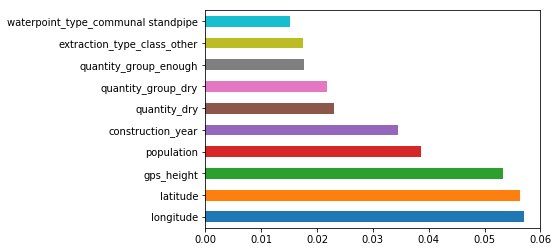

In [319]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Dcision Trees:

In [320]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100) 

# Creating the classifier object 
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)

# Performing training 
clf_gini.fit(X_train, y_train)

# Predicton on test with giniIndex
y_pred = clf_gini.predict(X_test)

X_pred = clf_gini.predict(X_train)


In [322]:
# calculate accuracy 
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 

print ("Accuracy TEST: ", accuracy_score(y_test,y_pred)*100)
print ("Accuracy Train: ", accuracy_score(y_train,X_pred)*100) 


print("Report Test: ", classification_report(y_test, y_pred))
print("Report Train: ", classification_report(y_train,X_pred)) 

Confusion Matrix:  [[3765   34  335]
 [ 349   62   79]
 [1251   19 1575]]
Accuracy TEST:  72.3256125317981
Accuracy Train:  72.08033472803346
Report Test:                           precision    recall  f1-score   support

             functional       0.70      0.91      0.79      4134
functional needs repair       0.54      0.13      0.20       490
         non functional       0.79      0.55      0.65      2845

            avg / total       0.73      0.72      0.70      7469

Report Train:                           precision    recall  f1-score   support

             functional       0.70      0.92      0.79     16575
functional needs repair       0.60      0.11      0.19      2009
         non functional       0.79      0.54      0.64     11291

            avg / total       0.73      0.72      0.70     29875

